### MACHINE LEARNING - 3 - Assignment
## By Prakash Ghosh
---

### Problem Statement

#### I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

#### Dataset: 

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.

#### Description of Variables

The dataset contains 6366 observations of 9 variables:

* rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good) <br>
* age: woman's age<br>
* yrs_married: number of years married<br>
* children: number of children<br>
* religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)<br>
* educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)<br>
* occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = * professional with advanced degree)<br>
* occupation_husb: husband's occupation (same coding as above)<br>
* affairs: time spent in extra-marital affairs

In [2]:
# Code to loading data and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
dta = sm.datasets.fair.load_pandas().data
dta.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273


In [3]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1


* Explore Data

In [4]:
# Statistical Analysis of the Dataset
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
# Group the Data with respect to average of affair
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [6]:
# Group the Data with respect to average of affair
dta.groupby('affair').count()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4313,4313,4313,4313,4313,4313,4313,4313,4313
1,2053,2053,2053,2053,2053,2053,2053,2053,2053


In [7]:
# Check how many women have affair (1 - having affair)
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [8]:
# Check how many women have affair in % (1 - having affair)
dta['affair'].value_counts(normalize=True)*100

0    67.75055
1    32.24945
Name: affair, dtype: float64

#### Data Visualisation
* histograms 

Text(0,0.5,'Affair')

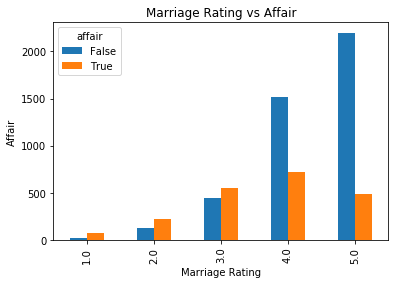

In [9]:
# barplot of Marriage Rating vs Affair
pd.crosstab(dta['rate_marriage'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Marriage Rating vs Affair')
plt.xlabel('Marriage Rating')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

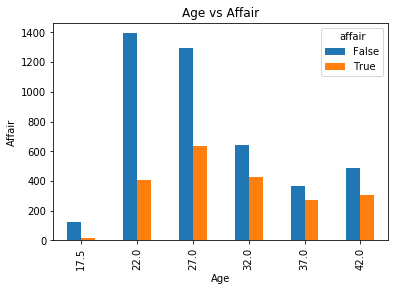

In [10]:
# barplot of Age vs Affair
pd.crosstab(dta['age'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Age vs Affair')
plt.xlabel('Age')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

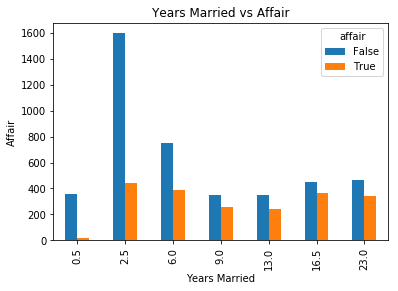

In [11]:
# barplot of Years Married vs Affair
pd.crosstab(dta['yrs_married'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Years Married vs Affair')
plt.xlabel('Years Married')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

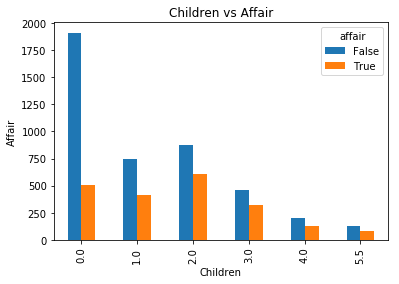

In [12]:
# barplot of Children vs Affair
pd.crosstab(dta['children'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Children vs Affair')
plt.xlabel('Children')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

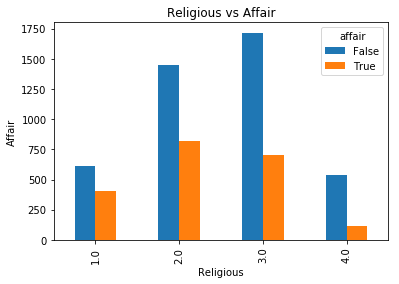

In [13]:
# barplot of Religious vs Affair
pd.crosstab(dta['religious'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Religious vs Affair')
plt.xlabel('Religious')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

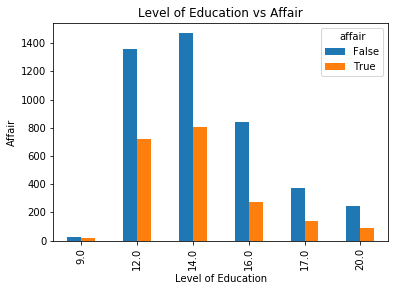

In [14]:
# barplot of Level of Education vs Affair
pd.crosstab(dta['educ'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Level of Education vs Affair')
plt.xlabel('Level of Education')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

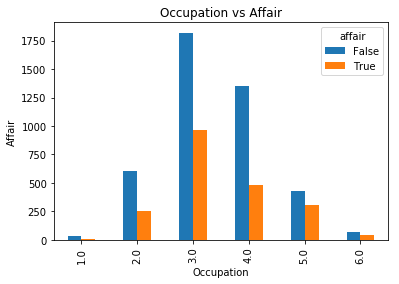

In [15]:
# barplot of Occupation vs Affair
pd.crosstab(dta['occupation'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Occupation vs Affair')
plt.xlabel('Occupation')
plt.ylabel('Affair')

Text(0,0.5,'Affair')

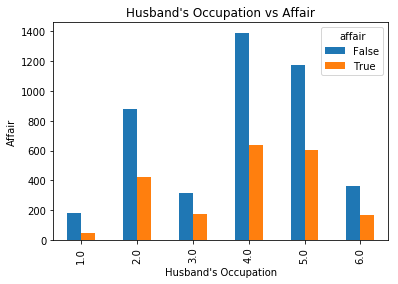

In [16]:
# barplot of Husband's Occupation  vs Affair
pd.crosstab(dta['occupation_husb'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title("Husband's Occupation vs Affair")
plt.xlabel("Husband's Occupation")
plt.ylabel('Affair')

#### Logistic Regression
* Prepare Data for Logistic Regression

In [17]:
#The dmatrices function 
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

#Print Target Variable i.e Affair
y

array([1., 1., 1., ..., 0., 0., 0.])

In [18]:
#Print Independant Variables
X.head(4)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0


In [19]:
lr = LogisticRegression()
lr = lr.fit(X, y)

# check the accuracy on the training set
lr.score(X, y)

0.7258875274897895

In [20]:
# Predict the affair and add to the dataframe
dta['Predict_Affair']=lr.predict(X)
dta.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,Predict_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,0.0


In [ ]:
print('% of Affairs - based on raw data:\t', round((y.mean()*100),2),'%')

In [21]:
# Now we will check our learning based on the analysis 
# examine the coefficients
X.columns, np.transpose(lr.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48983589],
        [ 0.18806639],
        [ 0.49894787],
        [ 0.25066856],
        [ 0.83900806],
        [ 0.83390843],
        [ 0.19063594],
        [ 0.29783271],
        [ 0.16140885],
        [ 0.18777091],
        [ 0.19401637],
        [-0.70312336],
        [-0.05841777],
        [ 0.10567654],
        [ 0.01691927],
        [-0.37113627],
        [ 0.0040165 ]]))

#### Evaluate the model by splitting dataset into train and test sets

In [22]:
# evaluate the model by splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# predict class labels for the test set
predict = lr2.predict(X_test)
predict

array([1., 0., 0., ..., 0., 0., 0.])

In [24]:
# generate class probabilities
y_probs = lr2.predict_proba(X_test)
y_probs

array([[0.3514634 , 0.6485366 ],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727385, 0.44272615],
       [0.81207043, 0.18792957],
       [0.74734601, 0.25265399]])

* Confusion matrix

In [25]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predict)
confusion_matrix

array([[1169,  134],
       [ 382,  225]], dtype=int64)

* Classification Report

In [26]:
classification_report= metrics.classification_report(y_test,predict)
print(classification_report)

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



* Model Accuracy

In [27]:
model_accuracy = lr2.score(X_test,y_test)
print(model_accuracy)

0.7298429319371728


* Evaluation metrics

In [28]:
print(metrics.accuracy_score(y_test, predict))
print(metrics.roc_auc_score(y_test, y_probs[:, 1]))

#The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

0.7298429319371728
0.745950606950631


* Model Evaluation Using Cross-Validation

In [30]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, np.ravel(y), scoring='accuracy', cv=10)
scores

array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
       0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ])

In [31]:
print(scores.mean())

0.7241630685514876


above results slated that , It's still performing at 73% accuracy.

#### Predicting the Probability of an Affair

Example: 
A women who is manager by profession, is college degree having somewhat religious, have 2 children from her marriage which is longer than 6 years. she is 30 years old women and rate her marriage is fair and her husband worked as a teacher:

As per affair dataset<br>
rate_marriage = 3 for fair marriage rating <br>
age = 30 <br>
yrs_married = 6 <br>
children =2 <br>
relegious values : 2 for somewhat religious<br>
edu= 14 for some college <br>
women's occupation = 5 for managerial/business ( 1 in occ_5 ) <br>
husband occupation = 4 for teacher/nurse/writer/technician/skilled ( 1 in occ_husb_4)

In [32]:
# Create array with the above value
col_array=np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 30, 6, 2, 2, 14]])

In [37]:
predict_affair=lr2.predict_proba(col_array)
predict_affair

array([[0.46401118, 0.53598882]])

In [41]:
print('The predicted probability of having an affair is:',round((predict_affair[0,1]*100),2) ,'%')

The predicted probability of having an affair is: 53.6 %


* i.e For an women aged 30 years, married more than 6 years with a teacher, having 2 children and who is doing a managerial job after completing a college degree and who is somewhat religious and rate her marriage as fair, the predicted probability of having an affair is: 53.6 %    